<a href="https://colab.research.google.com/github/Rishima15/CodSoft/blob/main/Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
from keras.layers import Dense, BatchNormalization, Dropout, LSTM
from keras.models import Sequential
from tensorflow.keras import regularizers
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score

In [3]:
data=pd.read_csv("Churn_Modelling.csv")
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
del data["CustomerId"]
del data["RowNumber"]

In [7]:
le=LabelEncoder()
data["Surname"]=le.fit_transform(data["Surname"])
data["Geography"]=le.fit_transform(data["Geography"])
data["Gender"]=le.fit_transform(data["Gender"])

In [8]:
data.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1115,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,1177,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,2040,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,289,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,1822,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [9]:
x=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

<Axes: ylabel='count'>

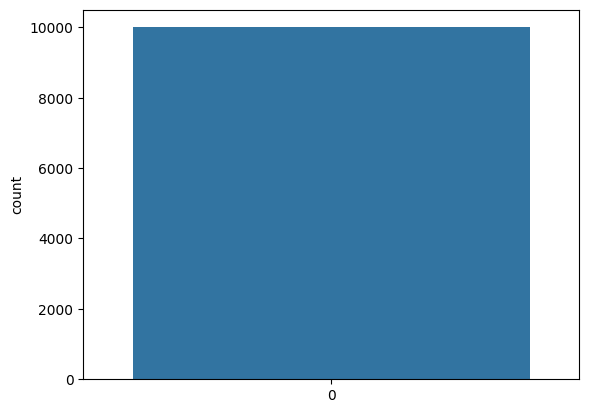

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(data["Exited"])

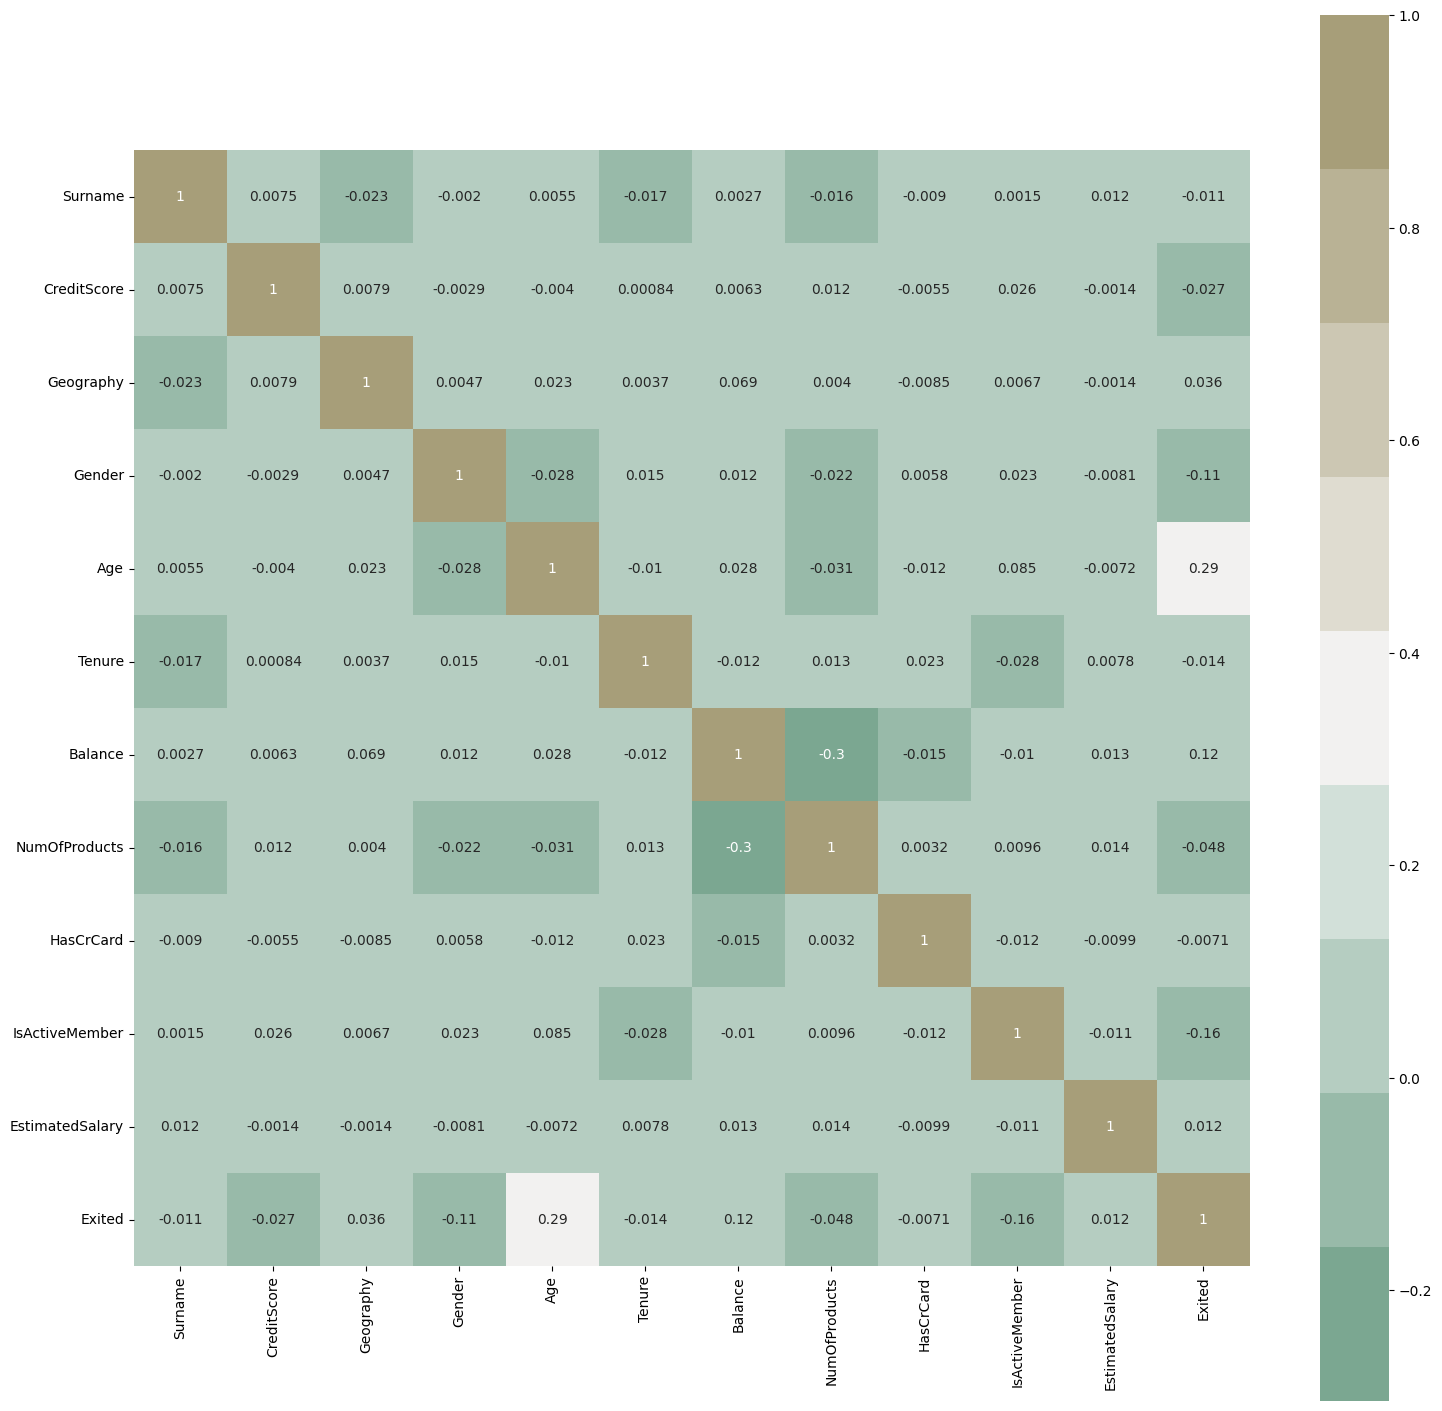

In [12]:
cmap=sns.diverging_palette(150,75,  s=40, l=65, n=9)
corrmat = data.corr()
plt.subplots(figsize=(18,18))
sns.heatmap(corrmat,cmap=cmap,annot=True, square=True);

<Axes: xlabel='Surname', ylabel='Density'>

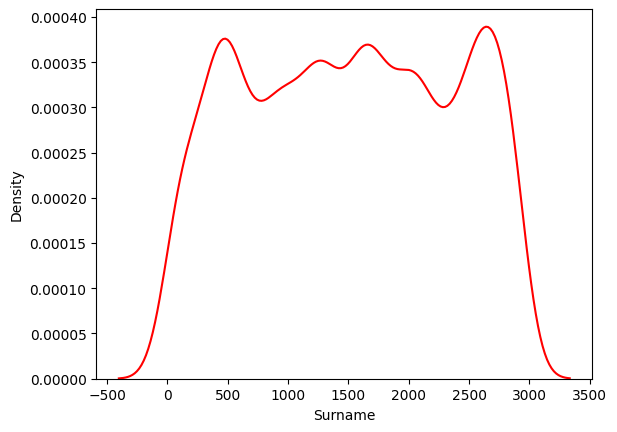

In [13]:
sns.kdeplot(data["Surname"],color='red')

<Axes: xlabel='CreditScore', ylabel='Density'>

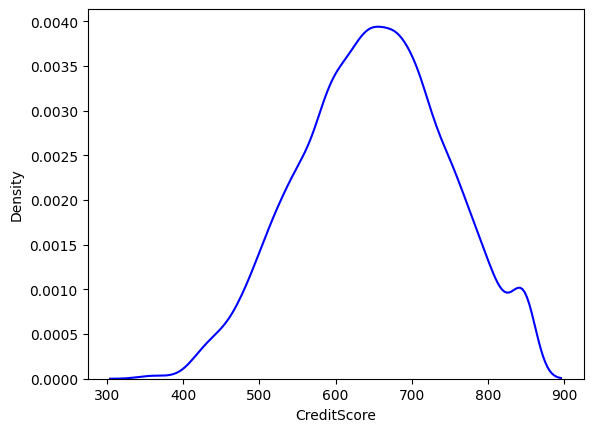

In [14]:
sns.kdeplot(data["CreditScore"],color='blue')

<Axes: xlabel='Balance', ylabel='Density'>

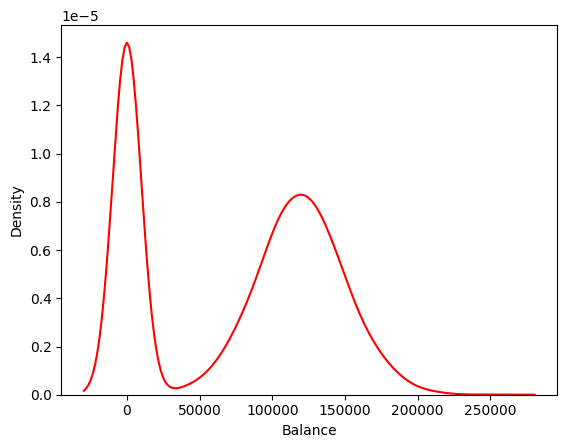

In [15]:
sns.kdeplot(data["Balance"],color='red')

<Axes: xlabel='EstimatedSalary', ylabel='Density'>

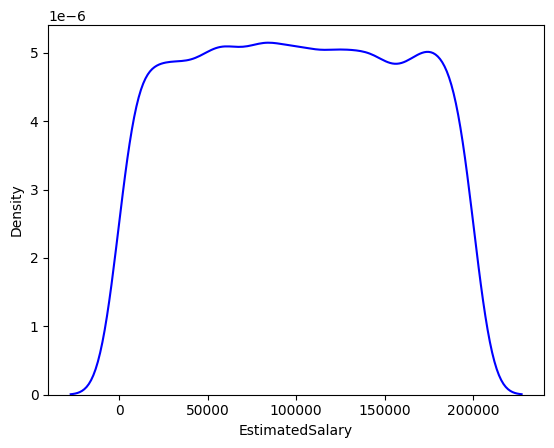

In [16]:
sns.kdeplot(data["EstimatedSalary"],color='blue')

<Axes: xlabel='Exited', ylabel='Density'>

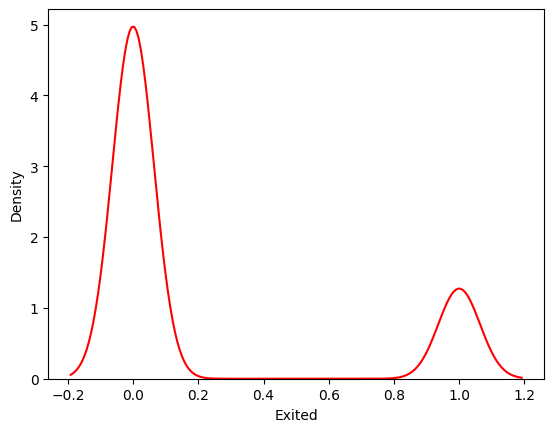

In [17]:
sns.kdeplot(data["Exited"],color='red')

In [18]:
Q1=data.quantile(0.25)
Q3=data.quantile(0.75)
IQR=Q3-Q1
IQR
print("outlier Counter of the all features")
((data < (Q1 - 1.5 * IQR)) | (data> (Q3 + 1.5 * IQR))).sum()

outlier Counter of the all features


Surname               0
CreditScore          15
Geography             0
Gender                0
Age                 359
Tenure                0
Balance               0
NumOfProducts        60
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited             2037
dtype: int64

In [19]:
for col in data.columns:
    if data[col].dtypes != 'object':
        q1 , q3 =data[col].quantile(0.25),data[col].quantile(0.75)
        iqr = q3 - q1
        ll = q1-1.5*iqr
        ul = q3 + 1.5*iqr
        data["CreditScore"] = np.where(data["CreditScore"]>ul,data["CreditScore"].mean(),np.where(data["CreditScore"]<ll,data["CreditScore"].mean(),data["CreditScore"]))
        data["Age"] = np.where(data["Age"]>ul,data["Age"].mean(),np.where(data["Age"]<ll,data["Age"].mean(),data["Age"]))
        data["NumOfProducts"] = np.where(data["NumOfProducts"]>ul,data["NumOfProducts"].mean(),np.where(data["NumOfProducts"]<ll,data["NumOfProducts"].mean(),data["NumOfProducts"]))

In [20]:
Q1=data.quantile(0.25)
Q3=data.quantile(0.75)
IQR=Q3-Q1
IQR
print("outlier Counter of the all features")
((data < (Q1 - 1.5 * IQR)) | (data> (Q3 + 1.5 * IQR))).sum()

outlier Counter of the all features


Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited             2037
dtype: int64

In [21]:
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
S=RandomOverSampler()
x_data,y_data=S.fit_resample(x,y)
print(Counter(y_data))

Counter({1: 7963, 0: 7963})


In [22]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
d=mms.fit_transform(x_data)
d

array([[0.38041624, 0.538     , 0.        , ..., 1.        , 1.        ,
        0.50673489],
       [0.40156943, 0.516     , 1.        , ..., 0.        , 1.        ,
        0.56270874],
       [0.69600819, 0.304     , 0.        , ..., 1.        , 0.        ,
        0.56965435],
       ...,
       [0.29409758, 0.888     , 0.        , ..., 1.        , 0.        ,
        0.83265292],
       [0.27703855, 0.404     , 0.        , ..., 1.        , 0.        ,
        0.50533891],
       [0.1835551 , 0.576     , 0.        , ..., 1.        , 0.        ,
        0.16834058]])

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(d,y_data,random_state=250,test_size=0.25)

In [24]:
from keras import callbacks
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True)

In [25]:
import tensorflow as tf
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=25, activation='relu'))
ann.add(tf.keras.layers.Dense(units=8, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
ann.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])
history = ann.fit(x_train,y_train,batch_size=20,epochs=100,validation_split=0.25)

Epoch 1/100
448/448 [==============================] - 4s 4ms/step - loss: 0.6644 - accuracy: 0.5991 - val_loss: 0.6374 - val_accuracy: 0.6477
Epoch 2/100
448/448 [==============================] - 2s 4ms/step - loss: 0.6125 - accuracy: 0.6747 - val_loss: 0.5925 - val_accuracy: 0.6835
Epoch 3/100
448/448 [==============================] - 2s 5ms/step - loss: 0.5772 - accuracy: 0.7018 - val_loss: 0.5652 - val_accuracy: 0.7140
Epoch 4/100
448/448 [==============================] - 1s 2ms/step - loss: 0.5489 - accuracy: 0.7240 - val_loss: 0.5413 - val_accuracy: 0.7267
Epoch 5/100
448/448 [==============================] - 1s 2ms/step - loss: 0.5248 - accuracy: 0.7362 - val_loss: 0.5363 - val_accuracy: 0.7230
Epoch 6/100
448/448 [==============================] - 1s 3ms/step - loss: 0.5066 - accuracy: 0.7499 - val_loss: 0.5091 - val_accuracy: 0.7418
Epoch 7/100
448/448 [==============================] - 1s 3ms/step - loss: 0.4970 - accuracy: 0.7526 - val_loss: 0.5159 - val_accuracy: 0.7398

In [26]:
y_pred = ann.predict(x_test)
y_pred = (y_pred > 0.5)
np.set_printoptions()
print(y_pred)

125/125 [==============================] - 0s 1ms/step
[[ True]
 [False]
 [ True]
 ...
 [ True]
 [ True]
 [False]]


In [27]:
Pred=[]
for s in y_pred:
    if s==False:
        a=0
        Pred.append(a)
    else:
        b=1
        Pred.append(b)

In [28]:
y_test

array([1, 0, 1, ..., 0, 1, 0])

In [29]:
Prediction=pd.DataFrame({"Actual":y_test,"Predicted":Pred})
Prediction

,Actual,Predicted
0,1,1
1,0,0
2,1,1
3,1,1
4,1,0
...,...,...
3977,1,1
3978,0,1
3979,0,1
3980,1,1


array([[1614,  370],
       [ 510, 1488]])

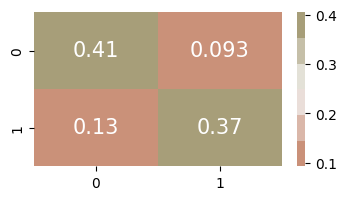

In [30]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
import matplotlib.pyplot as plt
cmap1 = sns.diverging_palette(751,75,  s=40, l=65, n=6)
plt.subplots(figsize=(4,2))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':15})
cf_matrix

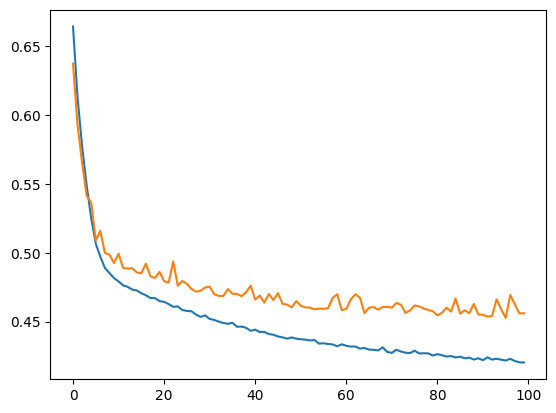

In [31]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

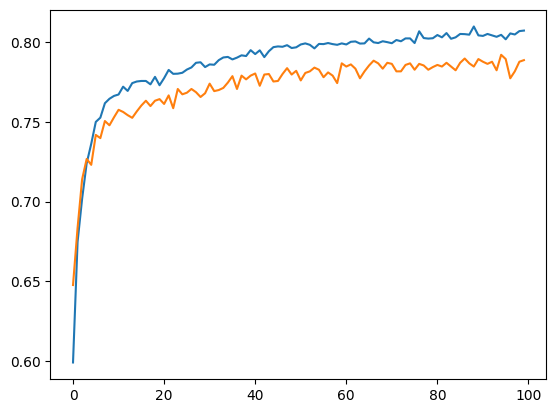

In [32]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [33]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.81      0.79      1984
           1       0.80      0.74      0.77      1998

    accuracy                           0.78      3982
   macro avg       0.78      0.78      0.78      3982
weighted avg       0.78      0.78      0.78      3982

